In [2]:
# =============================================================================
#
# Analisis básico
#
# =============================================================================

#
# Carga de datos
#
import functions  #  type: ignore


df_orig = functions.load_data()
display(df_orig.head())
display(df_orig.shape)







,yt_true
date,
1946-01-01,890
1946-02-01,992
1946-03-01,979
1946-04-01,959
1946-05-01,1110


(252, 1)

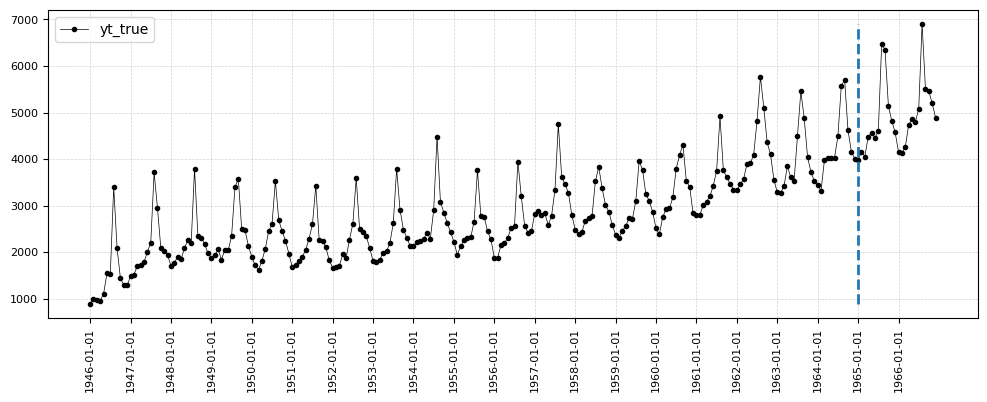

In [3]:


#
# Grafico de la serie
# La serie correspondiente al número total de personas empleadas
# mensualmente como mano de obra en el condado de Sutter
# (California) entre 1946:01 y 1966:12. Se deben usar los primeros
# 228 (de 1946:1 a 1964:12) datos para especificar el modelo y los
# 24 datos restantes (1965:1 a 1966:12) para evaluar el pronóstico
# un mes adelante por fuera de la muestra de calibración de
# los parámetros.
#
functions.plot_time_series(df_orig)







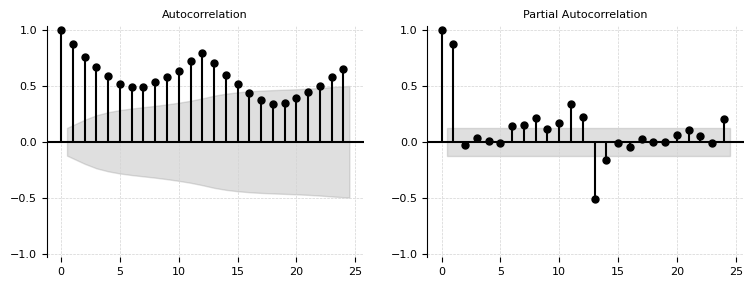

In [4]:


#
# Autocorrelograma simple
#
functions.acf_pacf_plots(df_orig.yt_true)





date
1946-01-01       NaN
1946-02-01     102.0
1946-03-01     -13.0
1946-04-01     -20.0
1946-05-01     151.0
1946-06-01     436.0
1946-07-01      -7.0
1946-08-01    1862.0
1946-09-01   -1309.0
1946-10-01    -656.0
1946-11-01    -135.0
1946-12-01     -14.0
1947-01-01     201.0
1947-02-01      29.0
1947-03-01     190.0
Name: yt_d1_true, dtype: float64

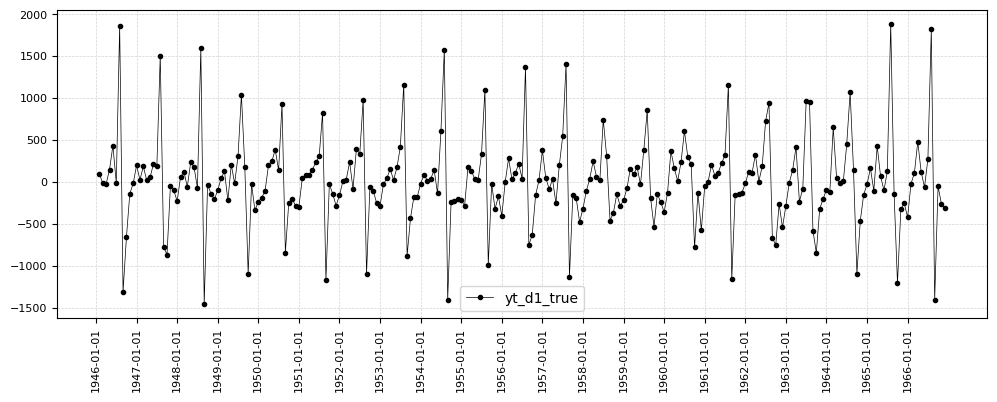

In [5]:



#
# Diferenciación simple de la serie
#
df_orig = df_orig.assign(yt_d1_true=df_orig.yt_true.diff(1))
display(df_orig.yt_d1_true.head(15))
functions.plot_time_series(df_orig, yt_col="yt_d1_true")





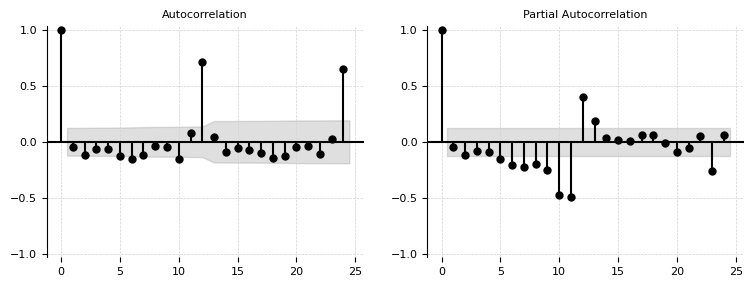

In [6]:


#
# Correlogramas simple y parcial
#
functions.acf_pacf_plots(df_orig.yt_d1_true.dropna())






date
1946-01-01      NaN
1946-02-01      NaN
1946-03-01      NaN
1946-04-01      NaN
1946-05-01      NaN
1946-06-01      NaN
1946-07-01      NaN
1946-08-01      NaN
1946-09-01      NaN
1946-10-01      NaN
1946-11-01      NaN
1946-12-01      NaN
1947-01-01      NaN
1947-02-01    -73.0
1947-03-01    203.0
Name: yt_d1d12_true, dtype: float64

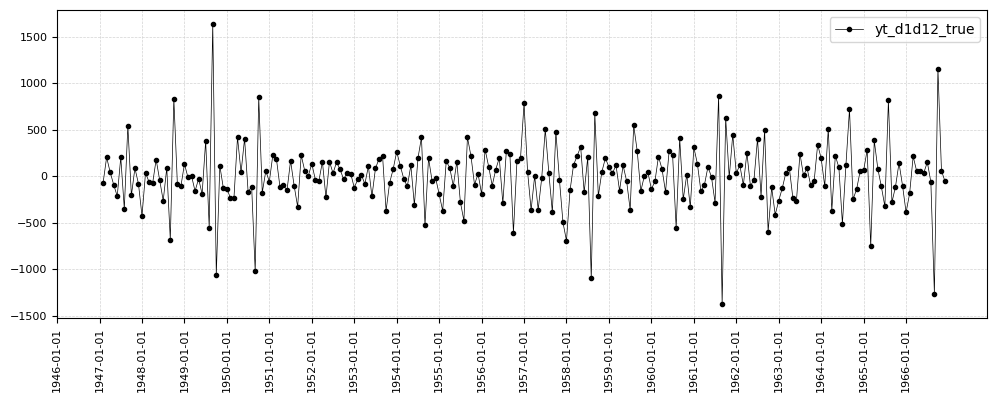

In [7]:


#
# Diferenciación estacional de la serie
#
df_orig = df_orig.assign(yt_d1d12_true=df_orig.yt_d1_true.diff(12))
display(df_orig.yt_d1d12_true.head(15))
functions.plot_time_series(df_orig, yt_col="yt_d1d12_true")






In [8]:

#
# Componentes de tendencia lineal
#
df_orig = functions.add_linear_trend_component(df_orig)
df_orig.head()




,yt_true,yt_d1_true,yt_d1d12_true,trend
date,,,,
1946-01-01,890,NaN,NaN,0
1946-02-01,992,102.0,NaN,1
1946-03-01,979,-13.0,NaN,2
1946-04-01,959,-20.0,NaN,3
1946-05-01,1110,151.0,NaN,4


In [11]:
#
# Componentes estacionales
#
df_orig = functions.add_month_component(df_orig)
df_orig.head(25) 


,yt_true,yt_d1_true,yt_d1d12_true,trend,month
date,,,,,
1946-01-01,890,NaN,NaN,0,1
1946-02-01,992,102.0,NaN,1,2
1946-03-01,979,-13.0,NaN,2,3
1946-04-01,959,-20.0,NaN,3,4
1946-05-01,1110,151.0,NaN,4,5
1946-06-01,1546,436.0,NaN,5,6
1946-07-01,1539,-7.0,NaN,6,7
1946-08-01,3401,1862.0,NaN,7,8
1946-09-01,2092,-1309.0,NaN,8,9


In [12]:







#
# Particionamiento de los datos
#
(
    X_complete,
    y_complete,
    X_train,
    y_train,
    X_test,
    y_test,
) = functions.train_test_split(
    df=df_orig,
    x_columns=["trend", "month"],
    y_column="yt_true",
)


In [13]:



#
# Especificación del Modelo
#
from sklearn.pipeline import Pipeline  #  type: ignore
from sklearn.preprocessing import (  #  type: ignore
    PolynomialFeatures,
    OneHotEncoder,
    MinMaxScaler,
)
from sklearn.linear_model import LinearRegression  #  type: ignore
from sklearn.compose import ColumnTransformer  #  type: ignore


def create_pipeline(degree):
    pipeline = Pipeline(
        [
            (
                "preprocessor",
                ColumnTransformer(
                    [
                        (
                            "trend",
                            Pipeline(
                                [
                                    ("poly", PolynomialFeatures(degree=degree)),
                                    ("scaler", MinMaxScaler()),
                                ]
                            ),
                            ["trend"],
                        ),
                        ("seasonal", OneHotEncoder(), ["month"]),
                    ]
                ),
            ),
            ("regressor", LinearRegression()),
        ]
    )

    return pipeline






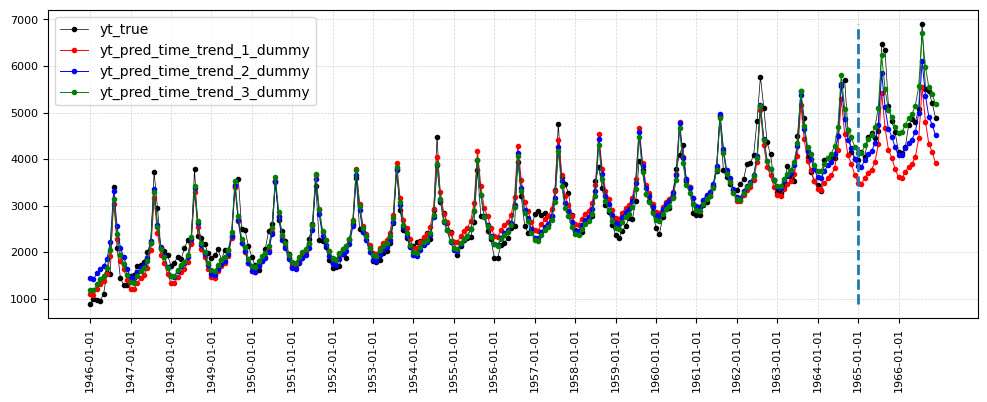

In [14]:



#
# Entrenamiento y pronostico
#
for degree in range(1, 4):
    pipeline = create_pipeline(degree=degree)
    pipeline.fit(X_train, y_train)
    df_orig[f"yt_pred_time_trend_{degree}_dummy"] = pipeline.predict(X_complete)

functions.plot_time_series(df_orig)




In [15]:

#
# Almacenamiento de los resultados
#
functions.save_forecasts(df_orig)



In [16]:


#
# Métricas de error
#
metrics = functions.compute_evaluation_metrics(df_orig)
functions.save_metrics(metrics)
metrics





,Metrics,yt_pred_time_trend_1_dummy,yt_pred_time_trend_2_dummy,yt_pred_time_trend_3_dummy
0,MSE Train,103217.67,78075.48,68044.66
1,MSE Test,738282.04,190079.09,107356.45
2,MAE Train,259.03,213.47,202.35
3,MAE Test,804.13,341.66,262.00
